In [11]:
import os
import cv2
import matplotlib.pyplot as plt

In [12]:
def display_cutmix_images(image_dir, num_images_to_display=9, images_per_row=3):
    image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    plt.figure(figsize=(20,10))
    for idx, img_file in enumerate(image_files[:num_images_to_display]):
        img_path = os.path.join(image_dir, img_file)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.subplot((num_images_to_display // images_per_row) + 1, images_per_row, idx + 1)
        plt.imshow(image)
        plt.title(f"Cutmix Image {idx+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

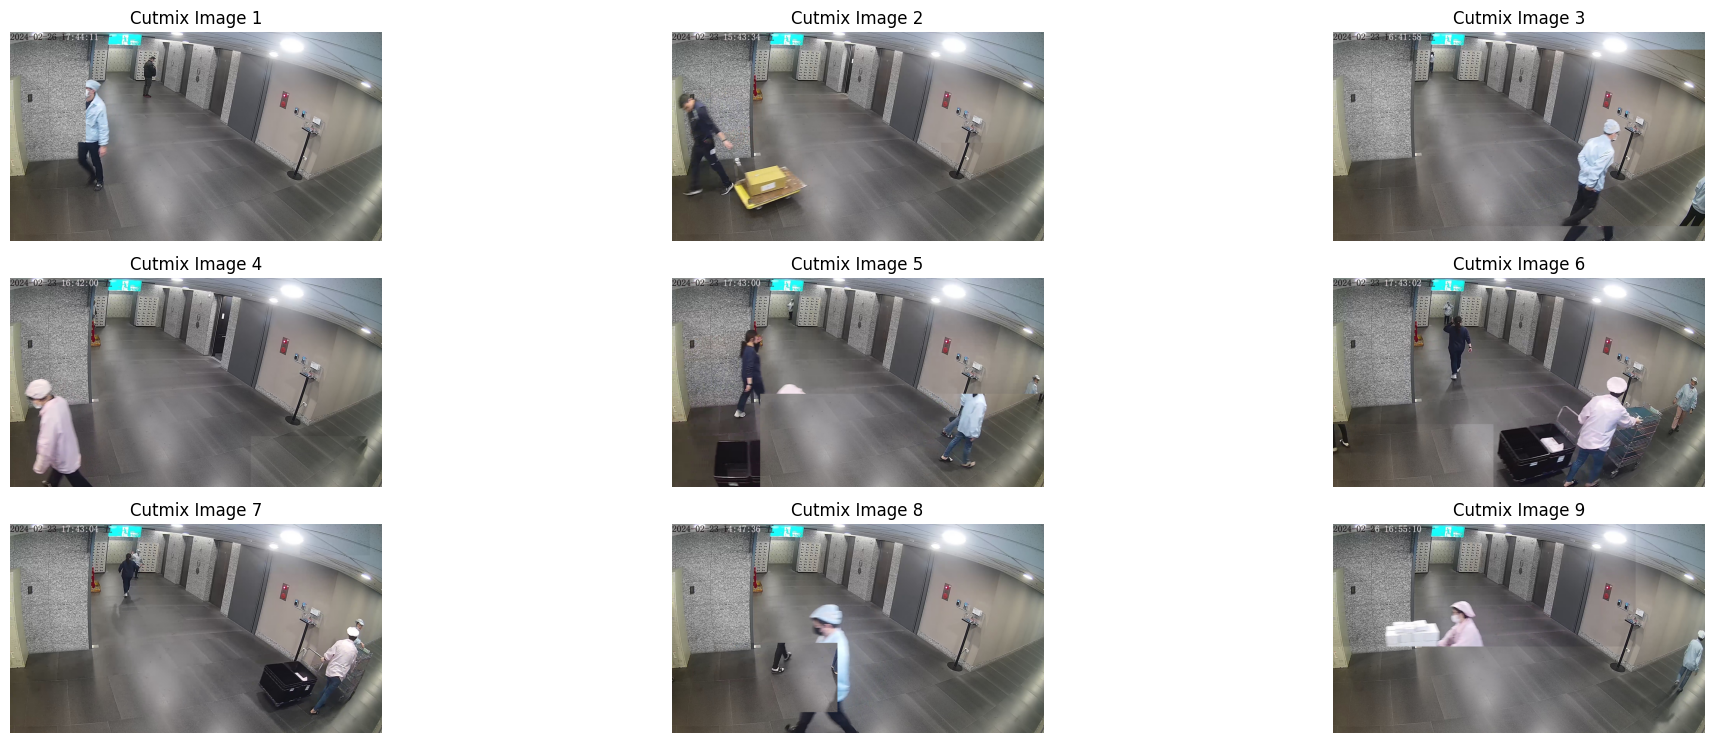

In [14]:
image_dir = 'test_cutmix'

display_cutmix_images(image_dir, num_images_to_display=9, images_per_row=3)